In [3]:
import pandas as pd
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline

In [4]:
clases = pd.read_csv('classes.csv')

In [5]:
clases_filtred = clases[clases['filename'].str.contains(r'^[a-zA-Z0-9_/\-.]+$', regex=True)]
clases_filtred['path'] = 'archive/' + clases_filtred['filename']

imagenes_random = clases_filtred['path'].sample(n=1000, random_state=42)

/var/folders/18/88x5gxxj0wq949rkr1_qj3_45113mn/T/ipykernel_22330/777794092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clases_filtred['path'] = 'archive/' + clases_filtred['filename']


In [7]:
images = []
features = []
for ima in  imagenes_random:
    image = cv2.imread(ima)
    image_resized = cv2.resize(image, (480,480), interpolation=cv2.INTER_AREA)
    images.append(image_resized)
    features.append(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))

In [8]:
features[0].shape

(480, 480, 3)

In [78]:
features_np = np.concatenate(features, axis=0)
features_np_nor = features_np/255

In [79]:
features_2d = features_np_nor.reshape(-1, 480 * 3 * 480) 

In [99]:
features_df=  pd.DataFrame(features_2d)
        

In [102]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,691190,691191,691192,691193,691194,691195,691196,691197,691198,691199
0,0.396078,0.313725,0.309804,0.317647,0.235294,0.231373,0.317647,0.235294,0.231373,0.278431,...,0.290196,0.372549,0.294118,0.301961,0.384314,0.305882,0.313725,0.388235,0.309804,0.317647
1,0.564706,0.462745,0.258824,0.592157,0.462745,0.298039,0.592157,0.482353,0.325490,0.588235,...,0.262745,0.349020,0.258824,0.278431,0.333333,0.235294,0.215686,0.490196,0.384314,0.341176
2,0.113725,0.074510,0.039216,0.109804,0.070588,0.035294,0.109804,0.070588,0.035294,0.098039,...,0.733333,0.835294,0.800000,0.725490,0.831373,0.792157,0.717647,0.827451,0.788235,0.713725
3,0.152941,0.290196,0.403922,0.207843,0.341176,0.458824,0.184314,0.317647,0.435294,0.176471,...,0.254902,0.137255,0.227451,0.176471,0.137255,0.196078,0.152941,0.101961,0.184314,0.133333
4,0.341176,0.211765,0.223529,0.286275,0.160784,0.168627,0.274510,0.137255,0.149020,0.403922,...,0.054902,0.274510,0.133333,0.105882,0.305882,0.168627,0.133333,0.219608,0.082353,0.050980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.976471,0.980392,0.988235,0.976471,0.980392,0.988235,0.976471,0.980392,0.988235,0.976471,...,0.984314,0.964706,0.980392,0.984314,0.964706,0.980392,0.984314,0.964706,0.980392,0.984314
996,0.043137,0.101961,0.188235,0.058824,0.113725,0.211765,0.058824,0.113725,0.219608,0.066667,...,0.160784,0.301961,0.254902,0.168627,0.294118,0.247059,0.160784,0.282353,0.235294,0.149020
997,0.776471,0.600000,0.364706,0.741176,0.580392,0.360784,0.686275,0.549020,0.356863,0.709804,...,0.329412,0.666667,0.462745,0.239216,0.862745,0.639216,0.411765,0.921569,0.698039,0.466667
998,0.972549,0.988235,0.992157,0.972549,0.988235,0.992157,0.972549,0.988235,0.992157,0.972549,...,0.984314,0.964706,0.980392,0.984314,0.964706,0.980392,0.984314,0.964706,0.980392,0.984314


In [104]:
#train_test_split(features_2d, _, train_size=0.8, random_state=7)

In [105]:
#make_pipeline(self.replib_lib, LogisticRegression())

kmenas = KMeans(n_clusters=5, n_init="auto")


In [109]:

kmenas.fit(features_df)

KMeans(n_clusters=5)

In [110]:
(kmenas.cluster_centers_ * 255).shape

(5, 691200)

In [111]:
kmenas.cluster_centers_[0]

array([0.83788969, 0.83227536, 0.78578079, ..., 0.80313161, 0.78792495,
       0.74024545])

Despues de varias pruebas y buscarle sentido a fitear el modelo con muchas imagenes, descubrí que no tiene sentido
ya que la idea es buscar los "centrides" de las imagenes y para eso solo se necesita una imagen a la vez por cada iteracion de entrenamiento.

In [57]:
# de la lista de imagenes, seleccionar una y hacer el respectivo analisis
imagen = images[7]

ima_1 = imagen.reshape(-1, 3)

scaler = StandardScaler()
normalized_imag = scaler.fit_transform(ima_1)

In [58]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(normalized_imag)


#centroides
colors = kmeans.cluster_centers_

#Ccnvertir los colores a valores RGB de 0-255
colors = np.clip(colors * 255, 0, 255).astype(int)

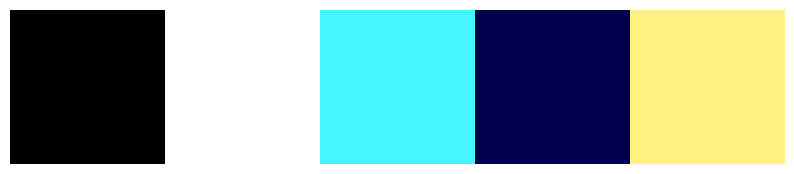

In [59]:

fig, ax = plt.subplots(figsize=(10, 2))


for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, fc=color/255))


ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()

# Uso


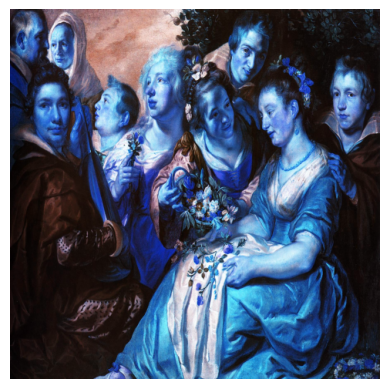

In [60]:
image_rgb = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)

plt.imshow(imagen)
plt.axis('off')  
plt.show()

In [22]:
#fin